# Distribution

In [1]:
using CairoMakie
using AlgebraOfGraphics
using DataFrames, DataFramesMeta
using CSV: File

## Stacked Histogram

In [2]:
mpg = File("../../data-df/mpg.csv") |> DataFrame;
mpg |> x -> first(x, 5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl
,String,String,Float64,Int64,Int64,String,String,Int64,Int64,String
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p


In [3]:
mpg |> names

11-element Vector{String}:
 "manufacturer"
 "model"
 "displ"
 "year"
 "cyl"
 "trans"
 "drv"
 "cty"
 "hwy"
 "fl"
 "class"

In [4]:
classes = mpg.class |> unique

7-element Vector{String}:
 "compact"
 "midsize"
 "suv"
 "2seater"
 "minivan"
 "pickup"
 "subcompact"

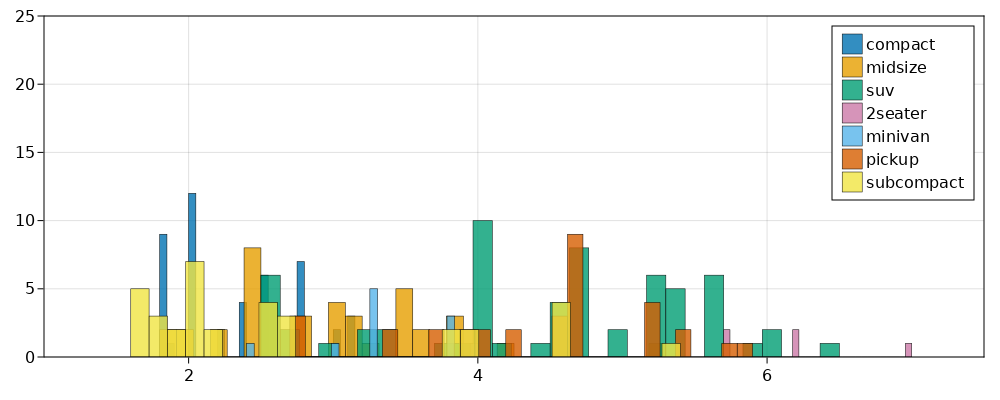

In [5]:
fig =
    Figure(resolution = (1000, 400), title = "Stacked Histogram of displ colored by class");
ax = Axis(fig[1, 1])

for c ∈ classes
    mpg_select = @rsubset(mpg, :class == c)
    hist!(ax, mpg_select[:, :displ]; bins=30, strokewidth = 0.5, strokecolor = :black, label = c)
end

xlims!(ax, (1, 7.5))
ylims!(ax, (0, 25))
axislegend(ax, position =:rt)
fig

## Density

In [6]:
fig = Figure(resolution = (1000, 400));
ax = Axis(fig[1, 1]);

for c ∈ ["compact", "suv", "minivan"]
    mpg_select = @rsubset(mpg, :class == c)
    hist!(ax, mpg_select[:, :cty]; bins=10, normalization = :pdf, strokewidth = 0.5, strokecolor = :black, label = c)
    density!(ax, mpg_select[:, :cty])
end

xlims!(ax, (5, 35))
ylims!(ax, (0, 1))
axislegend(ax, position =:rt)
fig

## Box

In [ ]:
fig = Figure(resolution = (1000, 400));
ax = Axis(fig[1, 1]);

# for c ∈ classes
#     mpg_select = @rsubset(mpg, :class == c)
#     boxplot(ax, mpg_select[:, :class], mpg_select[:, :cty], label = c)
# end

# fig

layers = visual(BoxPlot)

mpg |> 
    x -> data(x) * mapping(:class, :cty, color = :class) * layers |>
    x -> draw!(ax, x);

fig